In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [101]:
states=pd.read_csv("D:\Data_Science\Veri_Bilimi_Bootcamp\odevler\states_all.csv")
states.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [102]:
df = states.copy()

In [12]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


(1) See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?

<AxesSubplot:>

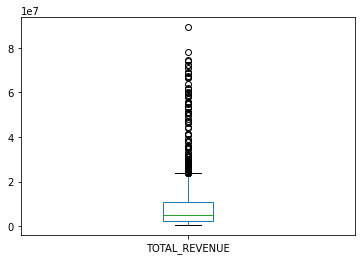

In [50]:
df.TOTAL_REVENUE.plot(kind="box")

<AxesSubplot:>

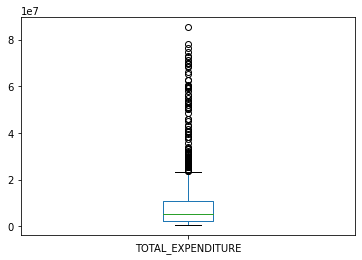

In [51]:
df.TOTAL_EXPENDITURE.plot(kind="box")

Değerlendirme;
1. Her iki değişkende outlier içerir.

In [30]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

(2) If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

In [85]:
from scipy.stats.mstats import winsorize

In [108]:
df["TOTAL_REVENUE"] = winsorize(df["TOTAL_REVENUE"],(0.10,0.26))
df["TOTAL_EXPENDITURE"] = winsorize(df["TOTAL_EXPENDITURE"], (0.10,0.26))

<AxesSubplot:>

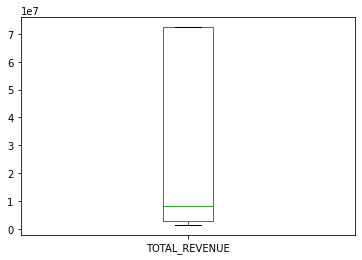

In [111]:
df.TOTAL_REVENUE.plot(kind="box")

<AxesSubplot:>

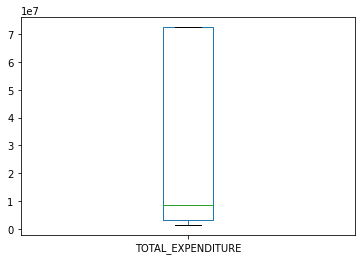

In [112]:
df.TOTAL_EXPENDITURE.plot(kind="box")

In [113]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

(3) Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [125]:
df["Budget_Deficit_1"] = df["TOTAL_REVENUE"] - df["TOTAL_EXPENDITURE"]
df["Budget_Deficit_1"]

0        25087.0
1        -5562.0
2      -143501.0
3       -31063.0
4      -878807.0
          ...   
1710   -117684.0
1711   -117684.0
1712   -117684.0
1713   -117684.0
1714   -117684.0
Name: Budget_Deficit_1, Length: 1715, dtype: float64

<AxesSubplot:>

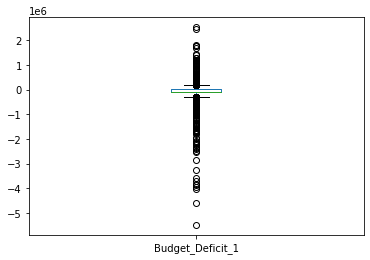

In [126]:
df["Budget_Deficit_1"].plot(kind="box")

<AxesSubplot:>

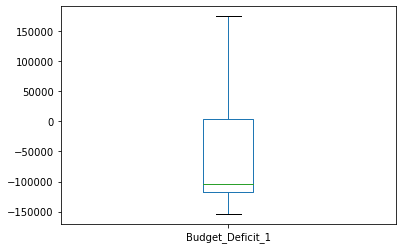

In [127]:
df["Budget_Deficit_1"] = winsorize(df["Budget_Deficit_1"],(0.2,0.1))
df["Budget_Deficit_1"].plot(kind="box")

In [120]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

(4) Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

In [128]:
df["Budget_Deficit_2"] =  df["TOTAL_EXPENDITURE"] - df["TOTAL_REVENUE"]
df["Budget_Deficit_2"]

0       -25087.0
1         5562.0
2       143501.0
3        31063.0
4       878807.0
          ...   
1710    117684.0
1711    117684.0
1712    117684.0
1713    117684.0
1714    117684.0
Name: Budget_Deficit_2, Length: 1715, dtype: float64

<AxesSubplot:>

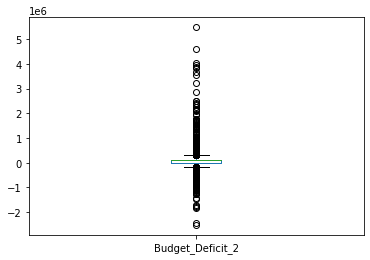

In [129]:
df["Budget_Deficit_2"].plot(kind="box")

<AxesSubplot:>

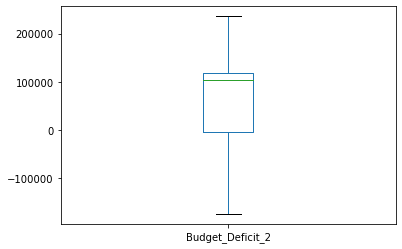

In [130]:
df["Budget_Deficit_2"] = winsorize(df["Budget_Deficit_2"],(0.1,0.15))
df["Budget_Deficit_2"].plot(kind="box")

In [131]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

(5) Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

In [132]:
df["Budget_Deficit_1"].describe()

count      1715.000000
mean     -45581.422741
std      106899.537942
min     -153751.000000
25%     -117684.000000
50%     -104748.000000
75%        3208.500000
max      174034.000000
Name: Budget_Deficit_1, dtype: float64

In [133]:
df["Budget_Deficit_2"].describe()

count      1715.000000
mean      59975.097959
std      124337.844845
min     -174034.000000
25%       -3208.500000
50%      104748.000000
75%      117684.000000
max      235935.000000
Name: Budget_Deficit_2, dtype: float64

Her ikiside farklı.

In [134]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

(6) If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

mean değeri pozitif olanı tercih edebiliriz.
df["Budget_Deficit_2"]